In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Gas consumption per capita.csv')
df.head(10)

,Entity,Code,Year,Gas consumption per capita (BP & UN (2017 revision))
0,Africa,NaN,1965,0.032724
1,Africa,NaN,1966,0.035646
2,Africa,NaN,1967,0.034371
3,Africa,NaN,1968,0.034195
4,Africa,NaN,1969,0.039699
5,Africa,NaN,1970,0.047855
6,Africa,NaN,1971,0.053236
7,Africa,NaN,1972,0.068955
8,Africa,NaN,1973,0.107221
9,Africa,NaN,1974,0.116869


In [2]:
df = df.rename(columns = {'Gas consumption per capita (BP & UN (2017 revision))': 'Gas consumption per capita (kWh)'})
df

,Entity,Code,Year,Gas consumption per capita (kWh)
0,Africa,NaN,1965,0.032724
1,Africa,NaN,1966,0.035646
2,Africa,NaN,1967,0.034371
3,Africa,NaN,1968,0.034195
4,Africa,NaN,1969,0.039699
...,...,...,...,...
3348,World,OWID_WRL,2011,4.832180
3349,World,OWID_WRL,2012,4.911813
3350,World,OWID_WRL,2013,4.924465
3351,World,OWID_WRL,2014,4.896768


In [3]:
df['Entity'].unique()

array(['Africa', 'Algeria', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'Finland', 'France', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait',
       'Lithuania', 'Malaysia', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'South Africa', 'South Korea', 'Spain', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Trinidad and Tobago',
       'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela',
       'Vietnam', 'World'], dtype=object)

## Visualising the trend of gas consumption per capita by individual country/region

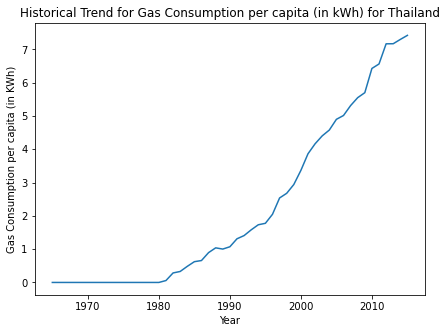

In [4]:
country_name = 'Thailand'
country = df.loc[df['Entity'] == country_name]

plt.figure(figsize = (7, 5))

plt.plot(country['Year'], country['Gas consumption per capita (kWh)'])

plt.title('Historical Trend for Gas Consumption per capita (in kWh) for {0}'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Gas Consumption per capita (in KWh)')

plt.show()

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

In [5]:
df

,Entity,Code,Year,Gas consumption per capita (kWh)
0,Africa,NaN,1965,0.032724
1,Africa,NaN,1966,0.035646
2,Africa,NaN,1967,0.034371
3,Africa,NaN,1968,0.034195
4,Africa,NaN,1969,0.039699
...,...,...,...,...
3348,World,OWID_WRL,2011,4.832180
3349,World,OWID_WRL,2012,4.911813
3350,World,OWID_WRL,2013,4.924465
3351,World,OWID_WRL,2014,4.896768


### Sort by region

In [6]:
non_countries = ['Africa', 'Asia Pacific', 'CIS', 'Central America', 'Europe', 'European Union', 'Middle Africa',
                 'Middle East', 'Non-OECD', 'North America', 'OECD', 'South & Central America', 'Western Africa',
                 'World']

In [7]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Gas consumption per capita (kWh)
0,Africa,NaN,1965,0.032724
1,Africa,NaN,1966,0.035646
2,Africa,NaN,1967,0.034371
3,Africa,NaN,1968,0.034195
4,Africa,NaN,1969,0.039699
...,...,...,...,...
3348,World,OWID_WRL,2011,4.832180
3349,World,OWID_WRL,2012,4.911813
3350,World,OWID_WRL,2013,4.924465
3351,World,OWID_WRL,2014,4.896768


### Sort by country

In [8]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Gas consumption per capita (kWh)
51,Algeria,DZA,1965,0.640127
52,Algeria,DZA,1966,0.646894
53,Algeria,DZA,1967,0.609621
54,Algeria,DZA,1968,0.622776
55,Algeria,DZA,1969,0.795920
...,...,...,...,...
3297,Vietnam,VNM,2011,0.992436
3298,Vietnam,VNM,2012,1.082551
3299,Vietnam,VNM,2013,1.115478
3300,Vietnam,VNM,2014,1.154770


## Top 10 Individual Countries by Mean Gas Consumption per capita

In [9]:
allgcc = df_country.groupby(['Entity'])['Gas consumption per capita (kWh)'].mean()
top10gcc = allgcc.nlargest(10)
tgcc = top10gcc.sort_values()
tgcc

Entity
Saudi Arabia             18.411858
Netherlands              22.880783
United States            24.698839
Canada                   25.179887
Russia                   28.008406
Turkmenistan             35.140808
Kuwait                   39.521671
Trinidad and Tobago      70.955818
United Arab Emirates     73.284206
Qatar                   160.687592
Name: Gas consumption per capita (kWh), dtype: float64

## Bar plots for gas consumption for the Top 10 Individual Countries with highest Mean Gas Consumption Per Capita

In [10]:
tgcc.index

Index(['Saudi Arabia', 'Netherlands', 'United States', 'Canada', 'Russia',
       'Turkmenistan', 'Kuwait', 'Trinidad and Tobago', 'United Arab Emirates',
       'Qatar'],
      dtype='object', name='Entity')

In [11]:
df_tgcc = df[df['Entity'].isin(tgcc.index)]
df_tgcc

,Entity,Code,Year,Gas consumption per capita (kWh)
515,Canada,CAN,1965,12.084553
516,Canada,CAN,1966,13.000547
517,Canada,CAN,1967,13.569324
518,Canada,CAN,1968,14.855151
519,Canada,CAN,1969,16.325472
...,...,...,...,...
3164,United States,USA,2011,23.512044
3165,United States,USA,2012,24.401354
3166,United States,USA,2013,24.896660
3167,United States,USA,2014,25.258552


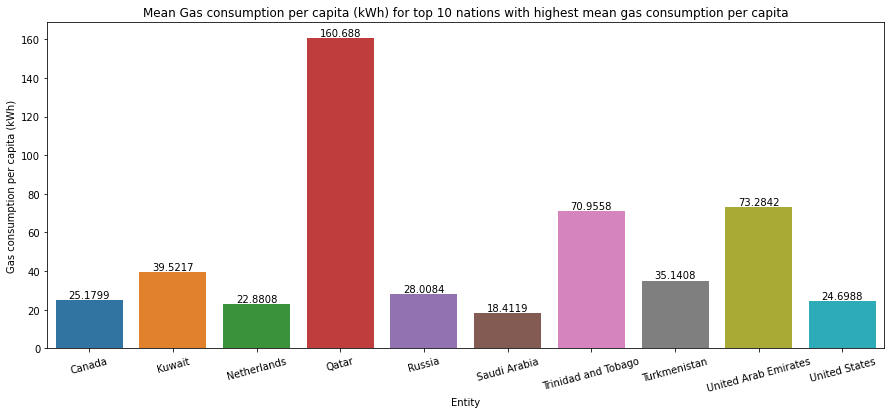

In [12]:
plt.figure(figsize = (15, 6))
plt.style.use('default')

ax = sns.barplot(x = 'Entity', y = 'Gas consumption per capita (kWh)', data = df_tgcc, ci = None)
ax.bar_label(ax.containers[0])

plt.title('Mean Gas consumption per capita (kWh) for top 10 nations with highest mean gas consumption per capita')
plt.xticks(rotation = 15)

plt.show()

## Historical Trend of top 10 countries with highest gas consumption per capita (in kWh) in the year of 2015

In [13]:
gcpc2015 = df_country.loc[df_country['Year'] == 2015]
tgcpcc = gcpc2015.nlargest(10, 'Gas consumption per capita (kWh)')
tgcpcc

,Entity,Code,Year,Gas consumption per capita (kWh)
2259,Qatar,QAT,2015,185.282366
2902,Trinidad and Tobago,TTO,2015,165.618297
3066,United Arab Emirates,ARE,2015,84.349537
1667,Kuwait,KWT,2015,56.743155
2984,Turkmenistan,TKM,2015,55.323761
2392,Saudi Arabia,SAU,2015,34.644395
565,Canada,CAN,2015,29.832647
2341,Russia,RUS,2015,29.300445
3168,United States,USA,2015,25.828950
1381,Iran,IRN,2015,25.159161


In [14]:
df_tgcpcc = df_country[df_country['Entity'].isin(tgcpcc['Entity'].values)]
df_tgcpcc

,Entity,Code,Year,Gas consumption per capita (kWh)
515,Canada,CAN,1965,12.084553
516,Canada,CAN,1966,13.000547
517,Canada,CAN,1967,13.569324
518,Canada,CAN,1968,14.855151
519,Canada,CAN,1969,16.325472
...,...,...,...,...
3164,United States,USA,2011,23.512044
3165,United States,USA,2012,24.401354
3166,United States,USA,2013,24.896660
3167,United States,USA,2014,25.258552


### Rearranging list for ordered plt.legend()

In [15]:
entity_sort = list(tgcpcc.sort_values('Entity')['Entity'].values)
entity_sort

['Canada',
 'Iran',
 'Kuwait',
 'Qatar',
 'Russia',
 'Saudi Arabia',
 'Trinidad and Tobago',
 'Turkmenistan',
 'United Arab Emirates',
 'United States']

In [16]:
new_sort = list(tgcpcc['Entity'])
new_sort 

['Qatar',
 'Trinidad and Tobago',
 'United Arab Emirates',
 'Kuwait',
 'Turkmenistan',
 'Saudi Arabia',
 'Canada',
 'Russia',
 'United States',
 'Iran']

In [17]:
ord_list = []

for item in new_sort:
    if item in entity_sort:
        ord_list.append(entity_sort.index(item))
    
ord_list

[3, 6, 8, 2, 7, 5, 0, 4, 9, 1]

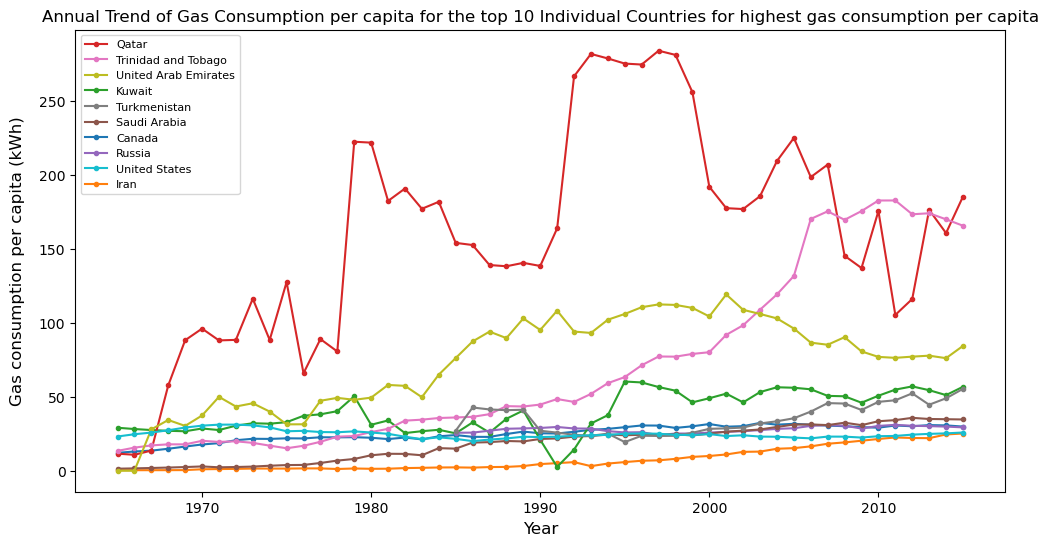

In [18]:
fig, ax = plt.subplots(figsize = (12, 6))

for gcc, group in df_tgcpcc.groupby('Entity'):
    group.plot(x = 'Year', y = 'Gas consumption per capita (kWh)', ax = ax, label = gcc, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Gas consumption per capita (kWh)', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Gas Consumption per capita for the top 10 Individual Countries for highest gas consumption per capita')

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()

## Historical Trend of gas consumption per capita (in kWh) in the world, up to the year of 2015

In [19]:
df_region

,Entity,Code,Year,Gas consumption per capita (kWh)
0,Africa,NaN,1965,0.032724
1,Africa,NaN,1966,0.035646
2,Africa,NaN,1967,0.034371
3,Africa,NaN,1968,0.034195
4,Africa,NaN,1969,0.039699
...,...,...,...,...
3348,World,OWID_WRL,2011,4.832180
3349,World,OWID_WRL,2012,4.911813
3350,World,OWID_WRL,2013,4.924465
3351,World,OWID_WRL,2014,4.896768


In [20]:
world_trend = df_region.loc[df['Entity'] == 'World']
world_trend

,Entity,Code,Year,Gas consumption per capita (kWh)
3302,World,OWID_WRL,1965,2.043343
3303,World,OWID_WRL,1966,2.178977
3304,World,OWID_WRL,1967,2.288339
3305,World,OWID_WRL,1968,2.440440
3306,World,OWID_WRL,1969,2.622830
3307,World,OWID_WRL,1970,2.797124
3308,World,OWID_WRL,1971,2.926092
3309,World,OWID_WRL,1972,3.020779
3310,World,OWID_WRL,1973,3.094443
3311,World,OWID_WRL,1974,3.099490


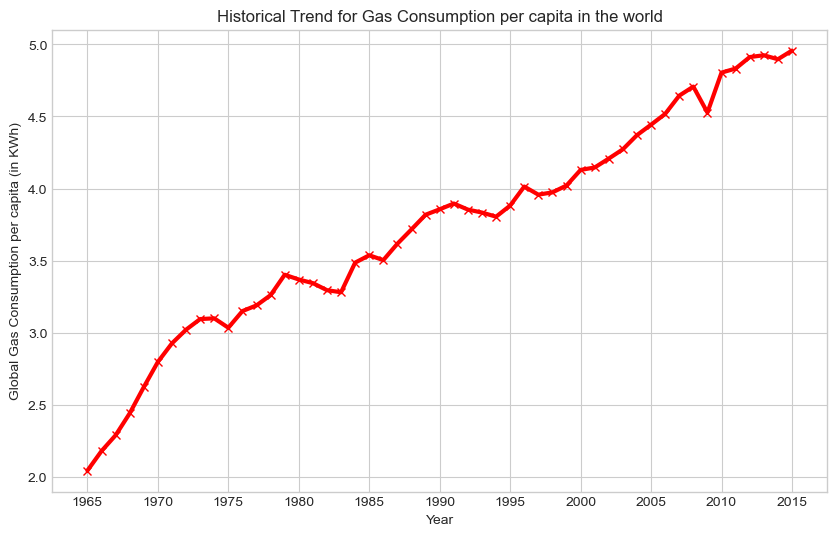

In [21]:
plt.figure(figsize = (10, 6))
plt.style.use('seaborn-whitegrid')

plt.plot(world_trend['Year'], world_trend['Gas consumption per capita (kWh)'], linewidth = 3, marker = 'x',
         color = 'red')

plt.title('Historical Trend for Gas Consumption per capita in the world'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Global Gas Consumption per capita (in KWh)')
plt.xticks(np.arange(1965, 2016, 5))

plt.show()